In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change to the directorywhere your dataset exist
cd ""

In [3]:
# Specifying the folder where images are present
TrainingImagePath=''

In [4]:
#import needed libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from tensorflow import keras
from keras.models import load_model,Sequential
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix
import os

In [5]:
#used to split dataset
!pip install split-folders --upgrade --quiet


Split with a ratio.
To only split into training and validation set, set a tuple  `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("input_folder", output="output",
 ratio=)

In [6]:
#split dataset into train,test,val
#change to your files location
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/flowers",output="/content/drive/MyDrive/dataset",ratio=(0.8,0.1,0.1))

Copying files: 4317 files [02:29, 28.83 files/s]


In [7]:
#Image Data Generator
train_gen = Imgen(preprocessing_function=keras.applications.resnet_v2.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

val_gen = Imgen(preprocessing_function=keras.applications.resnet_v2.preprocess_input,
                 zoom_range=0.2,
                  shear_range=0.2,
                  vertical_flip=True,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  fill_mode='nearest'
                 )

test_gen = Imgen(preprocessing_function=keras.applications.resnet_v2.preprocess_input
                 )

In [9]:
#change to the path you put data in 
train_ds = train_gen.flow_from_directory("/Tr-Te-Val/train",
                                       target_size=(64,64),
                                        seed = 123,
                                        batch_size=32
                                       )

val_ds = val_gen.flow_from_directory("/Tr-Te-Val/val",
                                       target_size=(64,64),
                                        seed = 123,
                                        batch_size=32)

test_ds = test_gen.flow_from_directory("/Tr-Te-Val/test",
                                       target_size=(64,64),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [10]:
#Getting the name of classes for ease of use
a = train_ds.class_indices
classes = list(a.keys())
print(classes)
b = test_ds.class_indices
classes = list(b.keys())
print(classes)
c = val_ds.class_indices
classes = list(c.keys())
print(classes)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [11]:
#extracting one batch from datagen for visualization purposes
#one batch
X,Y = next(train_ds)
#print(X,Y)

In [12]:
#plot function
def plot_images(img,labels):
    plt.figure(figsize=(15,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(img[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')

In [13]:
#create cnn model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [14]:
#compile 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 61, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 96)        98400     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 96)         0

In [16]:
# Defining Number Of Steps For Training & Validation Of Model
steps_per_epoch = train_ds.samples // 32
validation_steps = val_ds.samples // 32
print('Steps Per Epoch : Training ' + str(steps_per_epoch))
print('Steps : Validation  ' + str(validation_steps))

Steps Per Epoch : Training 107
Steps : Validation  13


In [17]:
#train model
hist=model.fit(
                    train_ds,
                    steps_per_epoch=steps_per_epoch,
                    epochs=5,
                    validation_data=val_ds,
                    validation_steps=validation_steps)
model.save("flower_recognation.h5")

Epoch 1/5
107/107 [==============================] - 774s 7s/step - loss: 1.3285 - accuracy: 0.3962 - val_loss: 1.1286 - val_accuracy: 0.5192
Epoch 2/5
107/107 [==============================] - 25s 233ms/step - loss: 1.1592 - accuracy: 0.5018 - val_loss: 1.0192 - val_accuracy: 0.5793
Epoch 3/5
107/107 [==============================] - 25s 238ms/step - loss: 1.0474 - accuracy: 0.5681 - val_loss: 0.9625 - val_accuracy: 0.6106
Epoch 4/5
107/107 [==============================] - 25s 232ms/step - loss: 0.9812 - accuracy: 0.6009 - val_loss: 0.9428 - val_accuracy: 0.6082
Epoch 5/5
107/107 [==============================] - 25s 235ms/step - loss: 0.9112 - accuracy: 0.6389 - val_loss: 0.8854 - val_accuracy: 0.6394


In [18]:
#load model
model = load_model("flower_recognation.h5")

In [19]:
#test model on test dataset
print('test_loss',"test_accuracy")
model.evaluate(test_ds)

test_loss test_accuracy
14/14 [==============================] - 95s 7s/step - loss: 0.9722 - accuracy: 0.6253


[0.9722076654434204, 0.6252873539924622]

#plot train,validation loss 
#plot train,validation accuracy 

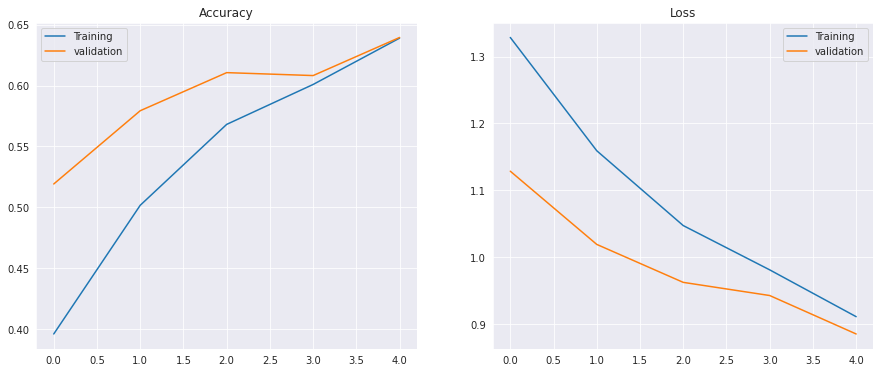

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()


#Classification report

In [21]:
preds = model.predict(test_ds,verbose=1)
pred = [np.argmax(i) for i in preds]
pred[:5]
actual = test_ds.classes
print(classification_report(pred,actual))

14/14 [==============================] - 2s 154ms/step
              precision    recall  f1-score   support

           0       0.71      0.59      0.64        94
           1       0.65      0.79      0.72        87
           2       0.16      0.62      0.26        21
           3       0.70      0.69      0.70        75
           4       0.84      0.53      0.65       158

    accuracy                           0.63       435
   macro avg       0.61      0.64      0.59       435
weighted avg       0.72      0.63      0.65       435



#Confusion Matrix

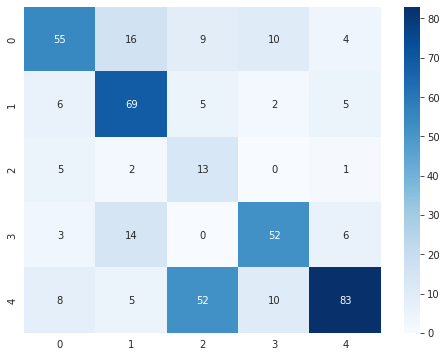

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred,actual),annot = True, fmt = 'd', cmap = 'Blues');

#Making single predictions

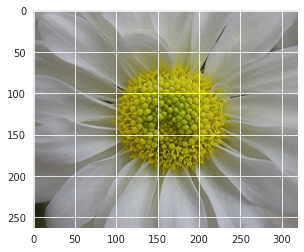

########################################
Prediction is:  daisy


In [23]:
path_img=""
import numpy as np
from keras.preprocessing import image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(path_img)
imgplot = plt.imshow(img)
plt.show()
ImagePath=path_img
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
 
result=model.predict(test_image,verbose=0)
 
print('####'*10)
print('Prediction is: ',classes[np.argmax(result)])